In [45]:
import numpy as np
from matplotlib import pyplot as plt

In [101]:
def show_image(img, vmax=1, save_img_name=None):
    if save_img_name != None:
        cv2.imwrite('img_out/' + save_img_name + '.jpg', img)
    
    plt.imshow(img, cmap='gray', vmin=0, vmax=vmax)
    plt.axis('off')
    plt.show()

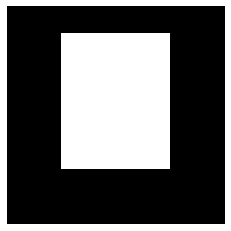

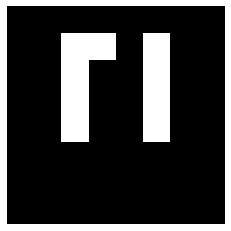

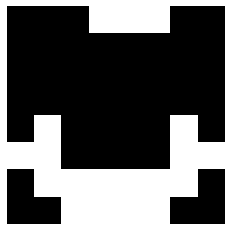

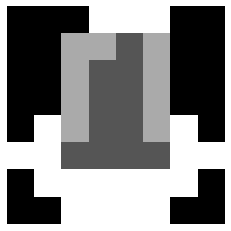

In [105]:
explored = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]])

obstacles = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]])

desired_result = np.array([
    [0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0, 0, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 1, 0, 0]])

combined_result = np.array([
    [0, 0, 0, 3, 3, 3, 0, 0],
    [0, 0, 2, 2, 1, 2, 0, 0],
    [0, 0, 2, 1, 1, 2, 0, 0],
    [0, 0, 2, 1, 1, 2, 0, 0],
    [0, 3, 2, 1, 1, 2, 3, 0],
    [3, 3, 1, 1, 1, 1, 3, 3],
    [0, 3, 3, 3, 3, 3, 3, 0],
    [0, 0, 3, 3, 3, 3, 0, 0]])

show_image(explored)
show_image(obstacles)
show_image(desired_result)
show_image(combined_result, vmax=3)

In [4]:
def pad_image(img, pad_width):
    padded_img = img.copy()

    for i in range(pad_width):
        padded_img = np.insert(padded_img, (0, len(padded_img)), 0, axis=0)
        padded_img = np.insert(padded_img, (0, len(padded_img[0])), 0, axis=1)

    return padded_img

In [64]:
# Performs convolution between an image and a 3x3 structuring element
# @param img input image
# @param conv 3x3 convolution as a 2d array
#
# returns the convolved image
def perform_convolution(img, conv, kernel_width=3):
    output_img = np.zeros(img.shape)
                                 
    # Add padding to input image
    padded_img = pad_image(img, pad_width=int(np.floor(kernel_width/2)))
    
    h, w = img.shape
    for i in range(h):
        for j in range(w):
            # Get sub array of image
            sub_array = padded_img[i : i + kernel_width, j : j + kernel_width]
            
            # Compute convolution
            output_img[i, j] = abs(np.sum(conv * sub_array))

    return output_img.astype(int)

In [65]:
def threshold_image(img, t, max_val):
    output_img = img.copy()
    for i, row in enumerate(img):
        for j, pixel in enumerate(row):
            output_img[i, j] = 0 if pixel < t else max_val
            
    return output_img

def adaptive_thresholding(img, t, max_val):
    blurred_img = apply_gaus_conv(img)
    out_img = img - blurred_img
    return threshold_image(out_img, t, max_val)

In [116]:
conv = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1],
])

frontier = perform_convolution(explored, conv, kernel_width=3)
obstacle_frontier = perform_convolution(obstacles, conv, kernel_width=3)

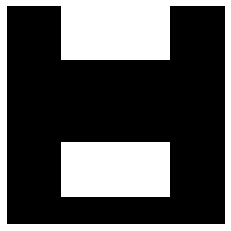

In [120]:
frontier_t = threshold_image(frontier, 2, 1)
show_image(frontier_t)


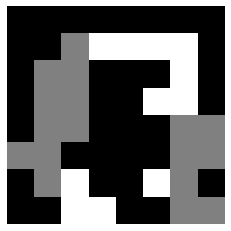

In [102]:
frontier = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 1, 2, 2, 2, 2, 0],
                     [0, 1, 1, 0, 0, 0, 2, 0],
                     [0, 1, 1, 0, 0, 2, 2, 0],
                     [0, 1, 1, 0, 0, 0, 1, 1],
                     [1, 1, 0, 0, 0, 0, 1, 1],
                     [0, 1, 2, 0, 0, 2, 1, 0],
                     [0, 0, 2, 2, 0, 0, 1, 1]])


show_image(frontier, vmax=2)